In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
train=pd.read_csv('/content/train_v9rqX0R.csv')
test=pd.read_csv('/content/test_AbJTz2l.csv')
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
train.shape,test.shape

((8523, 12), (5681, 11))

In [ ]:
train.isna().sum()
## Cheking null values present in the train dataset.

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
train.describe()
##Statistical summary of dataset only numerical part is described by this description. So to visualise the categorical columns next step is performed.

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
train.describe(include=object)
## To describe the categorical part 
## Count describes number of non-null values or observations
## Unique describes number of unique values or class
## Top describes most occuring class
## Frequency describes most repeated class in the dataset.

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDG33,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


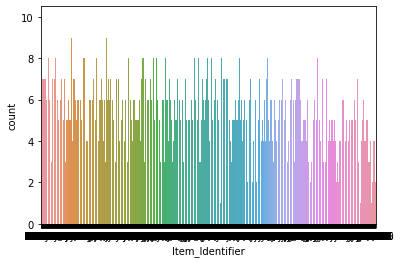

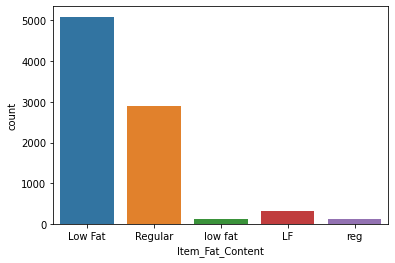

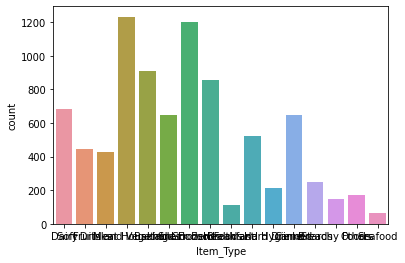

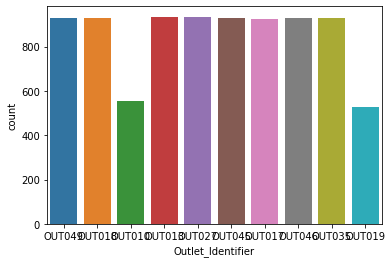

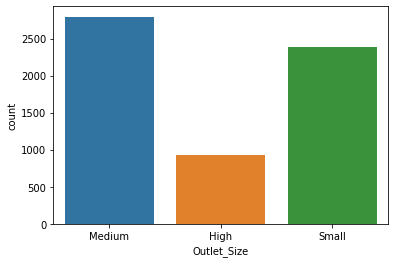

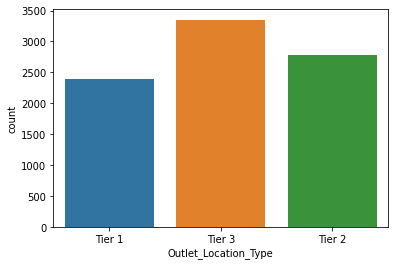

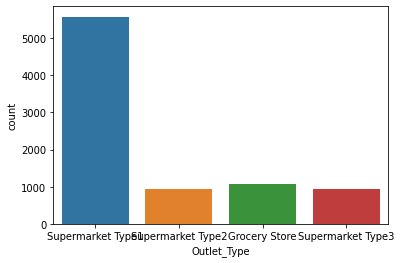

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
for variable in train.select_dtypes(include='object'):
  sns.countplot(train[variable])
  plt.show()
  ## Item_Identifier column can be dropped as it consists of all the unique entry so no new information is passed down.
## Visualise the categorical parts present.

In [2]:
train.drop('Item_Identifier',axis=1,inplace=True)
### Dropping the item itentifier columns as it consists of unique entries which are not useful.

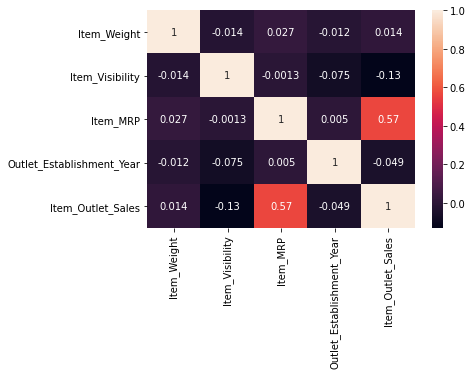

In [ ]:
sns.heatmap(train.corr(),annot=True)
## Heatmap also describes the numerical part only.

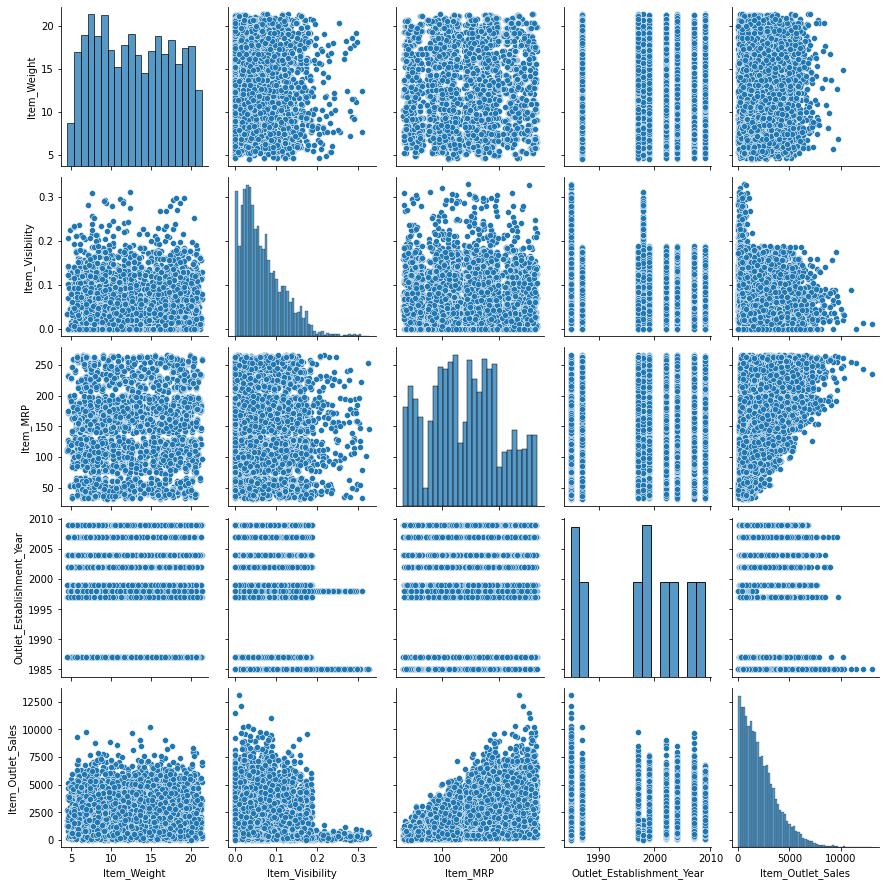

In [ ]:
sns.pairplot(train)
## Outlet_Establishment_Year is a categorical variable so lets convert it into categorical data.

In [ ]:
train['Outlet_Establishment_Year'].value_counts()
## There are total of 9 unique categories in year column.

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [3]:
train['Outlet_Establishment_Year']=train['Outlet_Establishment_Year'].astype(str)
## As outlet establishment year is considered as categorical type so 1stly converting it into str dtype and then moving further with one-hot encoding.

In [ ]:
train['Item_Weight'].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.560      2
9.420      1
5.400      1
6.520      1
7.685      1
Name: Item_Weight, Length: 415, dtype: int64

In [ ]:
train.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales'],
      dtype='object')

In [4]:
## Separating the target and independent variables.
X=train.drop('Item_Outlet_Sales',axis=1)
Y=train['Item_Outlet_Sales']
num=train.select_dtypes(exclude='object')

In [5]:
## To impute the missing values a pipeline is created which impute the numerical values with median and categorical values with most freqently occuring class.
## All the other columns are dropped which are not described in this.
## Fit and transfrom method is applied so that the model first learn and then apply the changes.
import pandas as pd 
import numpy as np 
  
from sklearn.compose import ColumnTransformer 
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler 
from sklearn.pipeline import Pipeline
trf1 = ColumnTransformer(transformers =[ 
    ('cat', SimpleImputer(strategy ='most_frequent'), ['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size',
                                                       'Outlet_Location_Type']), 
    ('num', SimpleImputer(strategy ='median'), ['Item_Weight','Item_Visibility','Item_MRP']), 
      
])
first_step = trf1.fit_transform(X)


In [6]:
col=['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type',
     'Item_Weight','Item_Visibility','Item_MRP']
fin_df=pd.DataFrame(first_step,columns=col)
fin_df.head()

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Weight,Item_Visibility,Item_MRP
0,Low Fat,Dairy,OUT049,1999,Medium,Tier 1,9.3,0.0160473,249.809
1,Regular,Soft Drinks,OUT018,2009,Medium,Tier 3,5.92,0.0192782,48.2692
2,Low Fat,Meat,OUT049,1999,Medium,Tier 1,17.5,0.0167601,141.618
3,Regular,Fruits and Vegetables,OUT010,1998,Medium,Tier 3,19.2,0,182.095
4,Low Fat,Household,OUT013,1987,High,Tier 3,8.93,0,53.8614


In [ ]:
fin_df.isna().sum()
## Checking the null values after imputation. All the null values were treated properly.

Item_Fat_Content             0
Item_Type                    0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Item_Weight                  0
Item_Visibility              0
Item_MRP                     0
dtype: int64

In [7]:
## One hot encoding is applied on the categorical columns so that it can be converted into numerical variables for model fitting.
cat=pd.get_dummies(fin_df,columns=['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type'],
                   drop_first=True)
cat.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3
0,9.3,0.0160473,249.809,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
1,5.92,0.0192782,48.2692,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1
2,17.5,0.0167601,141.618,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
3,19.2,0,182.095,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,8.93,0,53.8614,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [8]:
## Scaling the numerical variables.
a=cat[['Item_Weight','Item_Visibility','Item_MRP']]
b=a.columns
sc=StandardScaler()
a=sc.fit_transform(a)

In [9]:
num=pd.DataFrame(a,columns=b)

In [10]:
## Concatinating the numerical and categorical dataype after the encoding and standarization method.
df_fin=pd.concat([num,cat.iloc[:,3:]],axis=1)
df_fin.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3
0,-0.831187,-0.970732,1.747454,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
1,-1.630810,-0.908111,-1.489023,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1
2,1.108727,-0.956917,0.010040,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
3,1.510904,-1.281758,0.660050,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,-0.918719,-1.281758,-1.399220,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


## Lets check and build the basic model considering all the columns.

In [11]:
import statsmodels.api as sm
xc=sm.add_constant(df_fin)
model=sm.OLS(Y,xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     354.0
Date:                Mon, 14 Dec 2020   Prob (F-statistic):               0.00
Time:                        04:14:47   Log-Likelihood:                -71988.
No. Observations:                8523   AIC:                         1.440e+05
Df Residuals:                    8491   BIC:                         1.443e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            6.453e+14   1.25e+15      0.516      0.606   -1.81e+15     3.1e+15
Item_Weight                        -2.7218     12.375     -0.220      0.826     -26.980      21.536
Item_Visibility                   -15.6092     12.837     -1.216      0.224     -40.773       9.555
Item_MRP                          969.3343     12.318     78.694      0.000     945.188     993.480
Item_Fat_Content_Low Fat           30.9168     65.562      0.472      0.637     -97.602     159.435
Item_Fat_Content_Regular           75.0208     68.065      1.102      0.270     -58.402     208.444
Item_Fat_Content_low fat           78.3754    124.425      0.630      0.529    -165.528     322.279
Item_Fat_Content_reg              -28.1479    123.021     -0.229      0.819    -269.300     213.004
Item_Type_Breads                    3.9249     84.067      0.047      0.963    -160.867     168.716
Item_Type_Breakfast                 6.2646    116.639      0.054      0.957    -222.375     234.905
Item_Type_Canned                   25.0127     62.778      0.398      0.690     -98.047     148.072
Item_Type_Dairy                   -41.2815     62.245     -0.663      0.507    -163.297      80.734
Item_Type_Frozen Foods            -27.9787     58.888     -0.475      0.635    -143.413      87.456
Item_Type_Fruits and Vegetables    30.4138     54.971      0.553      0.580     -77.342     138.170
Item_Type_Hard Drinks              -2.1486     90.222     -0.024      0.981    -179.007     174.709
Item_Type_Health and Hygiene      -10.7174     68.021     -0.158      0.875    -144.055     122.620
Item_Type_Household               -39.4156     59.933     -0.658      0.511    -156.900      78.069
Item_Type_Meat                     -0.7287     70.668     -0.010      0.992    -139.255     137.798
Item_Type_Others                  -21.0535     98.638     -0.213      0.831    -214.408     172.301
Item_Type_Seafood                 184.3573    148.051      1.245      0.213    -105.859     474.573
Item_Type_Snack Foods             -11.3178     55.259     -0.205      0.838    -119.639      97.004
Item_Type_Soft Drinks             -27.4833     70.188     -0.392      0.695    -165.069     110.102
Item_Type_Starchy Foods            25.9385    103.117      0.252      0.801    -176.195     228.072
Outlet_Identifier_OUT013         -7.34e+14   1.42e+15     -0.516      0.606   -3.52e+15    2.06e+15
Outlet_Identifier_OUT017         2.436e+14   4.72e+14      0.516      0.606   -6.82e+14    1.17e+15
Outlet_Identifier_OUT018         2.447e+14   4.75e+14      0.516      0.606   -6.86e+14    1.17e+15
Outlet_Identifier_OUT019        -2.123e+14   4.12e+14     -0.516      0.606   -1.02e+15    5.95e+14
Outlet_Identifier_OUT027         4.875e+14   9.45e+14      0.516      0.606   -1.37

In [12]:
inp=df_fin.copy()
## Creating a copy of the input/independent variable so that drop can not affect the inputs for further model building.

## Applying backward elimination and choosing only those columns which satisfy the statistical condition of having p-value <0.05.

In [13]:
while(len(inp.columns)>0):
  inpc=sm.add_constant(inp)
  ols=sm.OLS(Y,inpc)
  ols_mod=ols.fit()
  f=ols_mod.pvalues[1:].idxmax()
  if ols_mod.pvalues[1:].max()>0.05:
    inp=inp.drop(f,axis=1)
  else:
    break
print('The final Features are:',inp.columns)

The final Features are: Index(['Item_MRP', 'Item_Fat_Content_Regular', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT046', 'Outlet_Establishment_Year_2002',
       'Outlet_Establishment_Year_2004', 'Outlet_Establishment_Year_2007',
       'Outlet_Establishment_Year_2009', 'Outlet_Size_Medium',
       'Outlet_Size_Small', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3'],
      dtype='object')


In [14]:
ols_mod.summary()
## Look at the model performance after all the steps.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     998.6
Date:                Mon, 14 Dec 2020   Prob (F-statistic):               0.00
Time:                        04:15:04   Log-Likelihood:                -71991.
No. Observations:                8523   AIC:                         1.440e+05
Df Residuals:                    8511   BIC:                         1.441e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           4289.9486     71.447     60.044      0.000    4149.895    4430.002
Item_MRP                         968.7893     12.224     79.256      0.000     944.828     992.750
Item_Fat_Content_Regular          55.4381     25.820      2.147      0.032       4.825     106.051
Outlet_Identifier_OUT017        -185.7497     19.866     -9.350      0.000    -224.692    -146.807
Outlet_Identifier_OUT018         821.0848     30.271     27.124      0.000     761.746     880.423
Outlet_Identifier_OUT027        3369.3365     60.458     55.730      0.000    3250.824    3487.849
Outlet_Identifier_OUT035         834.5861     26.211     31.841      0.000     783.206     885.966
Outlet_Identifier_OUT045        -271.5203     19.849    -13.679      0.000    -310.429    -232.612
Outlet_Identifier_OUT046        1901.7032     61.481     30.932      0.000    1781.186    2022.221
Outlet_Establishment_Year_2002  -271.5203     19.849    -13.679      0.000    -310.429    -232.612
Outlet_Establishment_Year_2004   834.5861     26.211     31.841      0.000     783.206     885.966
Outlet_Establishment_Year_2007  -185.7497     19.866     -9.350      0.000    -224.692    -146.807
Outlet_Establishment_Year_2009   821.0848     30.271     27.124      0.000     761.746     880.423
Outlet_Size_Medium             -1949.6173     60.493    -32.229      0.000   -2068.199   -1831.035
Outlet_Size_Small              -3949.4457     86.251    -45.790      0.000   -4118.518   -3780.374
Outlet_Location_Type_Tier 2      377.3161     21.909     17.222      0.000     334.369     420.263
Outlet_Location_Type_Tier 3    -2016.3111     60.518    -33.318      0.000   -2134.940   -1897.682
==============================================================================
Omnibus:                      966.766   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2315.043
Skew:                           0.670   Prob(JB):                         0.00
Kurtosis:                       5.174   Cond. No.                     1.01e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.71e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
df_fin.shape

(8523, 43)

## Going forward with the k-fold and cross val score to test and compare different models performance linear and non-linear both.
## The random state is defined to 0 with n_splits of 5 according to the basic instincts.
## Neg-mean_squared_error is considered as the scoring defining metrics which calculates the mean squred error(MSE). 
## This error is then computed into root mean squared error(RMSE) which defines the Bias Error for this model.
## Similarly with the help of MSE and RMSE standard deviation is calculated.
## bias error is the amount that a model's prediction differs from the target value, compared to the training data with the standard deviation, therefore a range is defined with these terms.
## So in general terms it can be said that our model will perform with an bias error of be and with the range of error as be+ve and be-ve.

In [15]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn.linear_model import LinearRegression
kf=KFold(shuffle=True,n_splits=5,random_state=0)
lr=LinearRegression()
score=cross_val_score(lr,inp,Y,cv=kf,scoring='neg_mean_squared_error')
score

array([-1275131.69618544, -1389787.58486204, -1243193.41821268,
       -1188287.52272223, -1275338.09212636])

## This is a linear model, so the above method columns removal is used in prediction

## Moving ahead with the non linear models and going with the independent variables without backward elimination.

In [16]:
import numpy as np
rmse=np.sqrt(np.abs(score))
be=np.mean(rmse)
ve=np.std(rmse,ddof=1)
be,ve

(1128.4980702130324, 32.39923508379755)

## GridSearchCV is used for parameter tuning where low bias error is the priority.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
param={'n_neighbors':np.arange(1,100),'weights':['uniform','distance']}
GS=GridSearchCV(knn,param,cv=kf,scoring='neg_mean_squared_error')
GS.fit(df_fin,Y)
GS.best_params_

{'n_neighbors': 47, 'weights': 'distance'}

## KNearestNeighbour Model Building

In [17]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors= 47, weights='distance')
score=cross_val_score(knn,df_fin,Y,cv=kf,scoring='neg_mean_squared_error')
rmse=np.sqrt(np.abs(score))
be=np.mean(rmse)
ve=np.std(rmse,ddof=1)
be,ve

(1122.3138599606598, 32.95356244145802)

## Decision Tree Model Building

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(random_state=0)
param={'max_depth':np.arange(1,15),'criterion':['mse']}
gs=GridSearchCV(dt,param,cv=kf,scoring='neg_mean_squared_error')
gs.fit(df_fin,Y)
gs.best_params_

{'criterion': 'mse', 'max_depth': 6}

In [18]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(max_depth=6,criterion='mse',random_state=0)
score=cross_val_score(dt,df_fin,Y,cv=kf,scoring='neg_mean_squared_error')
rmse=np.sqrt(np.abs(score))
be=np.mean(rmse)
ve=np.std(rmse,ddof=1)
be,ve

(1099.6641576164056, 28.95942982999934)

## Random Forest Model Building
### Here customised loop is applied so that least variance error can be found out.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_ve=[]
rf_be=[]
for i in np.arange(1,100):
  rf=RandomForestRegressor(n_estimators=i,criterion='mse',random_state=0)
  score=cross_val_score(rf,df_fin,Y,cv=kf,scoring='neg_mean_squared_error')
  rmse=np.sqrt(np.abs(score))
  rf_be.append(np.mean(rmse))
  rf_ve.append(np.std(rmse,ddof=1))

In [ ]:
np.min(rf_ve),np.argmin(rf_ve),rf_be[11]

(16.112106219735534, 11, 1159.3736679926888)

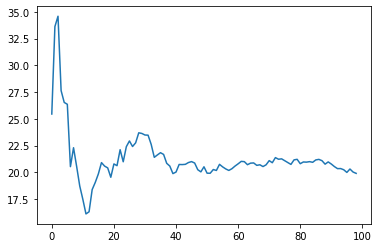

In [ ]:
plt.plot(np.arange(len(rf_ve)),rf_ve)

In [19]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=12,criterion='mse',random_state=0)
score=cross_val_score(rf,df_fin,Y,cv=kf,scoring='neg_mean_squared_error')
rmse=np.sqrt(np.abs(score))
be=np.mean(rmse)
ve=np.std(rmse,ddof=1)
be,ve

(1159.3736679926888, 16.112106219735534)

## Bagging Model Building
#### Base estimator is considered as Decision tree in this.

In [ ]:
from sklearn.ensemble import BaggingRegressor
br_be=[]
br_ve=[]
for n in np.arange(1,100):
  br=BaggingRegressor(base_estimator=dt,n_estimators=n,random_state=0)
  score=cross_val_score(br,df_fin,Y,cv=kf,scoring='neg_mean_squared_error')
  rmse=np.sqrt(np.abs(score))
  br_be.append(np.mean(rmse))
  br_ve.append(np.std(rmse,ddof=1))

In [ ]:
np.min(br_ve),np.argmin(br_ve),br_be[14]

(23.275135362927667, 3, 1085.062946345257)

In [20]:
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

## AdaBoost Model Building

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor(random_state=0)
adr_be=[]
adr_ve=[]
for n in np.arange(1,100):
  adr=AdaBoostRegressor(n_estimators=n,random_state=0)
  score=cross_val_score(adr,df_fin,Y,cv=kf,scoring='neg_mean_squared_error')
  rmse=np.sqrt(np.abs(score))
  adr_be.append(np.mean(rmse))
  adr_ve.append(np.std(rmse,ddof=1))

In [ ]:
np.min(adr_be),np.argmin(adr_be),adr_ve[2]

(1200.697759904431, 3, 16.1363674100675)

## Gradient Boost Model Building

In [ ]:
kf=KFold(shuffle=True,n_splits=5,random_state=0)
from sklearn.ensemble import GradientBoostingRegressor
ada=GradientBoostingRegressor(random_state=0)
gb_be=[]
gb_ve=[]
for n in np.arange(1,100):
  gb=GradientBoostingRegressor(n_estimators=n,random_state=0)
  score=cross_val_score(gb,df_fin,Y,cv=kf,scoring='neg_mean_squared_error')
  rmse=np.sqrt(np.abs(score))
  gb_be.append(np.mean(rmse))
  gb_ve.append(np.std(rmse,ddof=1))

In [ ]:
np.min(gb_be),np.argmin(gb_be),gb_ve[62]

(1079.5397388920383, 62, 30.27236057894313)

In [ ]:
import numpy as np
para={"learning_rate"     : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
       "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15], 
       'n_estimators'     :np.arange(1,100),
       'alpha'            : np.arange(0,1,0.01),
       'max_leaf_nodes'   : np.arange(1,50)}

## Gradient Boost with Hyperparameter Tuning Model

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
ada=GradientBoostingRegressor(random_state=0)
gs=GridSearchCV(ada,para,cv=kf,scoring='neg_mean_squared_error')
gs.fit(df_fin,Y)
gs.best_params_

In [21]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor(n_estimators=63,learning_rate=0.1,max_depth=3,random_state=0)
score=cross_val_score(gb,df_fin,Y,cv=kf,scoring='neg_mean_squared_error')
rmse=np.sqrt(np.abs(score))
be=np.mean(rmse)
ve=np.std(rmse,ddof=1)
be,ve

(1079.5397388920383, 30.27236057894313)

## XGBoost Model Building

In [ ]:
!pip install xgboost scikit-learn pandas numpy

In [22]:
import xgboost as xgb
from xgboost import XGBRegressor
gb=xgb.XGBRegressor(n_estimators=63,learning_rate=0.1,max_depth=3,random_state=0)
score=cross_val_score(gb,df_fin,Y,cv=kf,scoring='neg_mean_squared_error')
rmse=np.sqrt(np.abs(score))
be=np.mean(rmse)
ve=np.std(rmse,ddof=1)
be,ve

[04:16:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:16:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:16:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:16:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:16:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(1079.1319558908967, 29.02545946302096)

In [26]:
from xgboost import XGBRegressor
gb=XGBRegressor(random_state=0)
score=cross_val_score(gb,df_fin,Y,cv=kf,scoring='neg_mean_squared_error')
rmse=np.sqrt(np.abs(score))
be=np.mean(rmse)
ve=np.std(rmse,ddof=1)
be,ve

[04:17:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:17:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:17:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:17:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:17:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(1080.1741542581915, 28.284615529558558)

## Voting Models Building

In [27]:
from sklearn.ensemble import VotingRegressor

In [31]:
est=[('rf',rf),('dt',dt),('gbr',gdr),('bdt',bdt)]
est1=[('dt',dt),('rf',rf),('ada',ada)]
est2=[('rf',rf),('ada',ada),('bdt',bdt)]


In [32]:
est3=[('gdr',gdr),('bdt',bdt)]

In [33]:
vot1=VotingRegressor(estimators=est)
score=cross_val_score(vot1,df_fin,Y,cv=kf,scoring='neg_mean_squared_error')
rmse=np.sqrt(np.abs(score))
be=np.mean(rmse)
ve=np.std(rmse,ddof=1)
be,ve

(1085.4336116826494, 23.553665989376324)

In [34]:
vot1=VotingRegressor(estimators=est1)
score=cross_val_score(vot1,df_fin,Y,cv=kf,scoring='neg_mean_squared_error')
rmse=np.sqrt(np.abs(score))
be=np.mean(rmse)
ve=np.std(rmse,ddof=1)
be,ve

(1101.9870842208743, 18.189221831288506)

In [35]:
vot1=VotingRegressor(estimators=est2)
score=cross_val_score(vot1,df_fin,Y,cv=kf,scoring='neg_mean_squared_error')
rmse=np.sqrt(np.abs(score))
be=np.mean(rmse)
ve=np.std(rmse,ddof=1)
be,ve

(1101.6294826247408, 17.31563923285122)

In [36]:
vot1=VotingRegressor(estimators=est3)
score=cross_val_score(vot1,df_fin,Y,cv=kf,scoring='neg_mean_squared_error')
rmse=np.sqrt(np.abs(score))
be=np.mean(rmse)
ve=np.std(rmse,ddof=1)
be,ve

(1082.111272390133, 27.24466944384254)

## Comparing all the models build soo far to see which model perfromed the best for further analysis. 

In [37]:
models=[]
lr=LinearRegression()
knn=KNeighborsRegressor(n_neighbors= 47, weights='distance')
dt=DecisionTreeRegressor(max_depth=6,criterion='mse',random_state=0)
rf=RandomForestRegressor(n_estimators=12,criterion='mse',random_state=0)
bdt=BaggingRegressor(base_estimator=dt,n_estimators=4,random_state=0)
ada=AdaBoostRegressor(n_estimators=4,random_state=0)
gdr=GradientBoostingRegressor(n_estimators=63,random_state=0)
vot=VotingRegressor(estimators=est)
vot1=VotingRegressor(estimators=est1)
vot2=VotingRegressor(estimators=est2)
vot3=VotingRegressor(estimators=est3)
models.append(('Logistic',lr))
models.append(('KNN',knn))
models.append(('Decision Tree',dt))
models.append(('Random Forest',rf))
models.append(('Bagging DT',bdt))
models.append(('AdaBoostRegressor',ada))
models.append(('Gradient Boosting',gdr))
models.append(('Combo1',vot))
models.append(('Combo2',vot1))
models.append(('Combo3',vot2))
models.append(('Combo4',vot3))

Logistic: 1130.537109 (31.089525) (1161.626633)
KNN: 1122.313860 (32.953562) (1155.267422)
Decision Tree: 1099.664158 (28.959430) (1128.623587)
Random Forest: 1159.373668 (16.112106) (1175.485774)
Bagging DT: 1092.468845 (23.275135) (1115.743981)
AdaBoostRegressor: 1200.697760 (15.416716) (1216.114476)
Gradient Boosting: 1079.539739 (30.272361) (1109.812099)
Combo1: 1085.433612 (23.553666) (1108.987278)
Combo2: 1101.987084 (18.189222) (1120.176306)
Combo3: 1101.629483 (17.315639) (1118.945122)
Combo4: 1082.111272 (27.244669) (1109.355942)


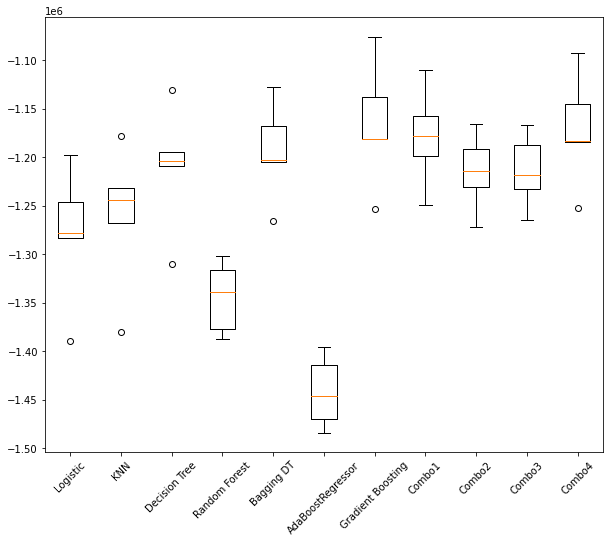

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
results=[]
names=[]
for name,model in models:
  cv_results=cross_val_score(model,df_fin,Y,cv=kf,scoring='neg_mean_squared_error')
  results.append(cv_results)
  names.append(name)
  rmse=np.sqrt(np.abs(cv_results))
  print('%s: %f (%f) (%f)' % (name,np.mean(rmse),np.std(rmse,ddof=1),np.mean(rmse)+np.std(rmse,ddof=1)))
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names,rotation=45)
plt.show()

In [ ]:
Ls=Lasso(alpha=0.1)
param={'alpha':np.arange(0,10,0.01)}
GS=GridSearchCV(Ls,param,cv=kf)
GS.fit(df_fin,Y)
GS.best_params_

{'alpha': 2.48}

In [ ]:
Rd=Ridge(alpha=0.5)
param={'alpha':np.arange(0,20,0.01)}
GS=GridSearchCV(Rd,param,cv=kf)
GS.fit(df_fin,Y)
GS.best_params_

{'alpha': 10.21}

In [ ]:
models1=[]
Ls=Lasso(alpha=2.48)
Rd=Ridge(alpha=10.21)
En=ElasticNet(alpha=0.01,l1_ratio=0.9899999999999995)
models1.append(('Ridge',Rd))
models1.append(('Lasso',Ls))
models1.append(('Elastic',En))

Ridge: 1130.519445 (31.636561)
Lasso: 1129.337851 (32.633312)
Elastic: 1130.501489 (31.145422)


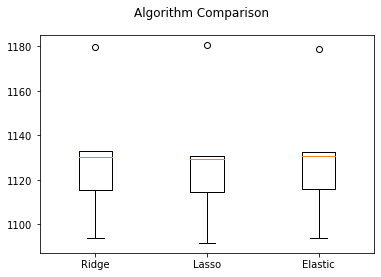

In [ ]:
# evaluate each model in turn
results = []
names = []
for name, model in models1:
	kfold = KFold(shuffle=True,n_splits=5,random_state=0)
	cv_results = cross_val_score(model, df_fin, Y,cv=kf, scoring='neg_mean_squared_error')
	results.append(np.sqrt(np.abs(cv_results)))
	names.append(name)
	print("%s: %f (%f)" % (name, np.mean(np.sqrt(np.abs(cv_results))),np.std(np.sqrt(np.abs(cv_results)),ddof=1)))
   # boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# From all the models the best that i can come up are top 3 models, so lets check them one by one:
## 1))
## 1) Random Forest 
## 2) Decision Tree 
## 3) Gradient Boosting with Hyperparameters
## 4) Boosting with base estimator Decision Tree
## 2))
## GradientBoosting Model
## 3))
## XGBoost model
## FInally the least error i can obtained is with XGBoost so below is the solutions .


In [40]:
test['Outlet_Establishment_Year']=test['Outlet_Establishment_Year'].astype(str)

In [41]:
df=pd.DataFrame()
df['Item_Identifier']=test['Item_Identifier']
test.drop('Item_Identifier',axis=1,inplace=True)

In [ ]:
df.head()

,Item_Identifier
0,FDW58
1,FDW14
2,NCN55
3,FDQ58
4,FDY38


## Applying the same steps that is applied to the train model and then fitting the selected model.

In [42]:

first_step_test = trf1.transform(test)
fin_df_test=pd.DataFrame(first_step_test,columns=col)
cat=pd.get_dummies(fin_df_test,columns=['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Establishment_Year',
                                        'Outlet_Size','Outlet_Location_Type'],drop_first=True)
a=cat[['Item_Weight','Item_Visibility','Item_MRP']]
b=a.columns
a=sc.transform(a)
num=pd.DataFrame(a,columns=b)
df_fin_test=pd.concat([num,cat.iloc[:,3:]],axis=1)

In [43]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
x_train,x_test,y_train,y_test=train_test_split(df_fin,Y,random_state=0,test_size=0.2)
vot1=VotingRegressor(estimators=est)
vot1.fit(x_train,y_train)
y_pred=vot1.predict(x_test)
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

1094.6423219273659

In [53]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
x_train,x_test,y_train,y_test=train_test_split(df_fin,Y,random_state=0,test_size=0.2)
gb=GradientBoostingRegressor(n_estimators=63,learning_rate=0.1,max_depth=3,random_state=0)
gb.fit(x_train,y_train)
y_pred=gb.predict(x_test)
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

1087.279120361604

In [46]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
x_train,x_test,y_train,y_test=train_test_split(df_fin,Y,random_state=0,test_size=0.2)
vot1=VotingRegressor(estimators=est3)
vot1.fit(x_train,y_train)
y_pred=vot1.predict(x_test)
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

1093.1129418579344

In [54]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
x_train,x_test,y_train,y_test=train_test_split(df_fin,Y,random_state=0,test_size=0.2)
xgb=XGBRegressor(n_estimators=63,learning_rate=0.1,max_depth=3,random_state=0)
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

[05:00:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


1086.7665245042413

In [55]:
xgb.fit(df_fin,Y)

[05:00:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=63,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
vot1=VotingRegressor(estimators=est)
vot1.fit(df_fin,Y)

VotingRegressor(estimators=[('rf',
                             RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=12, n_jobs=None,
                         

In [ ]:
y_pred_fin=vot1.predict(df_fin_test)

In [56]:
y_pred_fin_xgb=xgb.predict(df_fin_test)

In [ ]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [58]:
fin_df_test['Item_Outlet_Sales']=y_pred_fin_xgb
fin_df_test.head()

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,Low Fat,Snack Foods,OUT049,1999,Medium,Tier 1,20.75,0.00756484,107.862,1671.000732
1,reg,Dairy,OUT017,2007,Medium,Tier 2,8.3,0.0384277,87.3198,1366.005249
2,Low Fat,Others,OUT010,1998,Medium,Tier 3,14.6,0.0995749,241.754,586.559692
3,Low Fat,Snack Foods,OUT017,2007,Medium,Tier 2,7.315,0.0153884,155.034,2461.991943
4,Regular,Dairy,OUT027,1985,Medium,Tier 3,12.6,0.118599,234.23,5901.684570


In [ ]:
fin_df_test['Item_Outlet_Sales']=y_pred_fin_gb
fin_df_test.head()

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,Low Fat,Snack Foods,OUT049,1999,Medium,Tier 1,20.75,0.00756484,107.862,1678.048906
1,reg,Dairy,OUT017,2007,Medium,Tier 2,8.3,0.0384277,87.3198,1352.125140
2,Low Fat,Others,OUT010,1998,Medium,Tier 3,14.6,0.0995749,241.754,623.775219
3,Low Fat,Snack Foods,OUT017,2007,Medium,Tier 2,7.315,0.0153884,155.034,2462.620741
4,Regular,Dairy,OUT027,1985,Medium,Tier 3,12.6,0.118599,234.23,6034.680048


In [59]:
df['Outlet_Identifier']=fin_df_test['Outlet_Identifier']

In [60]:
df['Item_Outlet_Sales']=fin_df_test['Item_Outlet_Sales']

In [61]:
df.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1671.000732
1,FDW14,OUT017,1366.005249
2,NCN55,OUT010,586.559692
3,FDQ58,OUT017,2461.991943
4,FDY38,OUT027,5901.684570


In [ ]:
df.isna().sum()

Item_Identifier      0
Outlet_Identifier    0
Item_Outlet_Sales    0
dtype: int64

In [62]:
from google.colab import files
df.to_csv('BigMartSalesPrediction1.csv') 
files.download('BigMartSalesPrediction1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>